In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Salary Data.csv')
df.head(5)

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  40 non-null     float64
 1   Salary            40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 772.0 bytes


In [6]:
df.describe()

,Experience Years,Salary
count,40.000000,40.000000
mean,5.152500,74743.625000
std,2.663715,25947.122885
min,1.100000,37731.000000
25%,3.200000,56878.250000
50%,4.600000,64472.500000
75%,6.875000,95023.250000
max,10.500000,122391.000000


In [7]:
df.isnull().sum()

Experience Years    0
Salary              0
dtype: int64

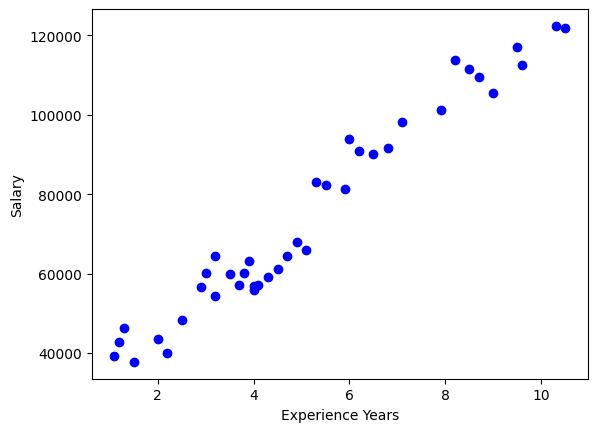

In [9]:
%matplotlib inline
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.scatter(df['Experience Years'], df['Salary'], color = 'blue', marker = 'o')

In [13]:
x = df[['Experience Years']]
x.head(5)

,Experience Years
0,1.1
1,1.2
2,1.3
3,1.5
4,2.0


In [14]:
y = df[['Salary']]
y.head(5)

,Salary
0,39343
1,42774
2,46205
3,37731
4,43525


In [15]:
x.mean()

Experience Years    5.1525
dtype: float64

In [16]:
y.mean()

Salary    74743.625
dtype: float64

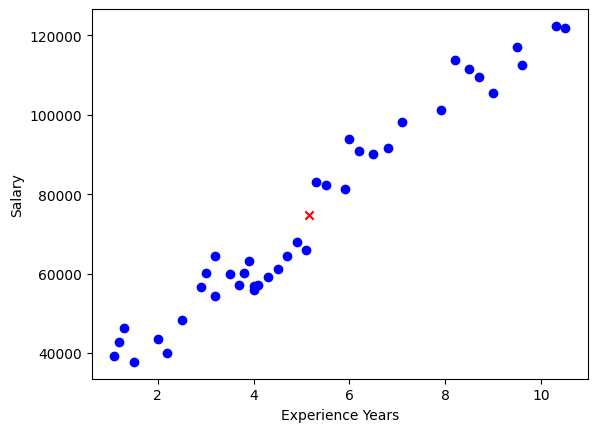

In [17]:
%matplotlib inline
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.scatter(df['Experience Years'], df['Salary'], color = 'blue', marker = 'o')
plt.scatter(x.mean(), y.mean(), color = 'red', marker = 'x')

In [23]:
x.mode()

,Experience Years
0,3.2
1,4.0


In [24]:
y.mode()

,Salary
0,37731
1,39343
2,39891
3,42774
4,43525
5,46205
6,48266
7,54445
8,55794
9,56642


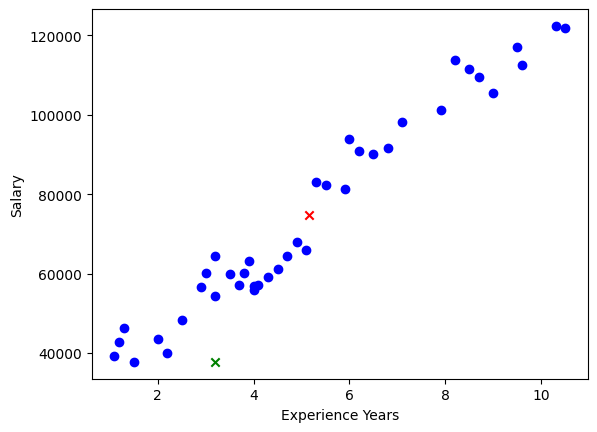

In [64]:
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.scatter(df['Experience Years'], df['Salary'], color = 'blue', marker = 'o')
plt.scatter(x.mean(), y.mean(), color = 'red', marker = 'x')
plt.scatter(x.mode().values[0], y.mode().values[0], color = 'green', marker = 'x')

## Linear Rregression


In [30]:
from sklearn import linear_model

In [36]:
reg = linear_model.LinearRegression()

In [37]:
reg.fit(x, y)

LinearRegression()

In [ ]:
# coefficient
m = reg.coef_
m

array([[9523.65050742]])

In [ ]:
# y intercept
c = reg.intercept_
c

array([25673.01576053])

In [40]:
reg.predict([[5.6]])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[79005.45860207]])

In [41]:
m * 5.6 + c

array([[79005.45860207]])

#### Best fit line visualization

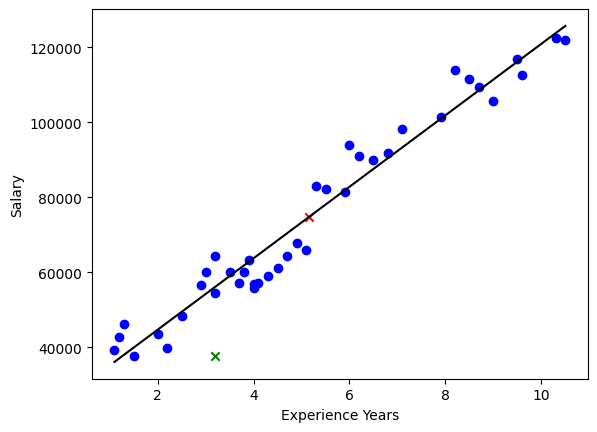

In [65]:
plt.plot(x, reg.predict(x), 'black')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.scatter(df['Experience Years'], df['Salary'], color = 'blue', marker = 'o')
plt.scatter(x.mean(), y.mean(), color = 'red', marker = 'x')
plt.scatter(x.mode().values[0], y.mode().values[0], color = 'green', marker = 'x')

#### Bes-fit line with predicted value

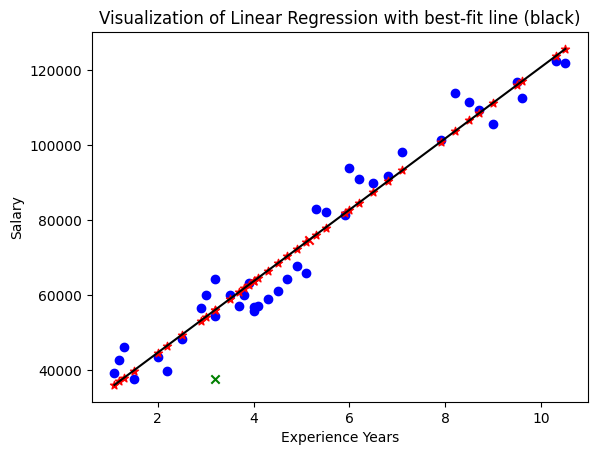

In [76]:
plt.plot(x, reg.predict(x), 'black')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title('Visualization of Linear Regression with best-fit line (black)')
plt.scatter(df['Experience Years'], df['Salary'], color = 'blue', marker = 'o')
plt.scatter(x.mean(), y.mean(), color = 'red', marker = 'x')
plt.scatter(x.mode().values[0], y.mode().values[0], color = 'green', marker = 'x')
plt.scatter(x, reg.predict(x), color = 'red', marker = '*')

In [47]:
reg.predict([[8.3]])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[104719.3149721]])

## Loss and Cost Function

In [67]:
df['Predicted Salary / predicted_y'] = reg.predict(x)
df.head(5)

,Experience Years,Salary,Predicted Salary,Predicted Salary / predicted_y
0,1.1,39343,36149.031319,36149.031319
1,1.2,42774,37101.396369,37101.396369
2,1.3,46205,38053.761420,38053.761420
3,1.5,37731,39958.491522,39958.491522
4,2.0,43525,44720.316775,44720.316775


In [68]:
df['Loss'] = df['Salary'] - df['Predicted Salary / predicted_y']
df.head(5)

,Experience Years,Salary,Predicted Salary,Predicted Salary / predicted_y,Loss
0,1.1,39343,36149.031319,36149.031319,3193.968681
1,1.2,42774,37101.396369,37101.396369,5672.603631
2,1.3,46205,38053.761420,38053.761420,8151.238580
3,1.5,37731,39958.491522,39958.491522,-2227.491522
4,2.0,43525,44720.316775,44720.316775,-1195.316775


In [69]:
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
MSE = mean_squared_error(df['Salary'], df['Predicted Salary / predicted_y'])
MSE

28960383.65377621

### Performance / Acuracy

In [72]:
reg.score(x, y)

0.9558814451799361

In [74]:
r2_score(y, reg.predict(x))

0.9558814451799361